# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari kaggle: [dataset kesejahteraan pekerja](https://www.kaggle.com/datasets/wowevan/dataset-kesejahteraan-pekerja-indonesia/data)
   
2. **Ketentuan Dataset**:
   - Dataset yang digunakan dalam analisis ini antara lain:

   - rataRataUpah.csv : Dataset yang memuat informasi tentang Rata-Rata Upah Pekerja per Jam, dengan pembagian berdasarkan provinsi dan tahun.
   - minUpah.csv : Dataset yang mencatat data tentang Upah Minimum Provinsi (UMP), yang terdistribusi berdasarkan provinsi dan tahun.
   - garisKemiskinan.csv : Dataset yang memuat data Garis Kemiskinan per Kapita, dengan pemisahan berdasarkan provinsi, tahun, periode survei, jenis pengeluaran, dan daerah tempat tinggal.
   - pengeluaran.csv : Dataset yang berisi informasi tentang Rata-Rata Pengeluaran per Kapita, dengan pembagian berdasarkan provinsi, tahun, jenis pengeluaran, dan daerah tempat tinggal.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from tabulate import tabulate

# **3. Memuat Dataset**

In [73]:
path = kagglehub.dataset_download("wowevan/dataset-kesejahteraan-pekerja-indonesia")

In [74]:
df_garis_kemiskinan = pd.read_csv("Dataset/garisKemiskinan.csv")
df_garis_kemiskinan

,provinsi,jenis,daerah,tahun,periode,gk
0,ACEH,MAKANAN,PERKOTAAN,2015,MARET,293697.0
1,ACEH,MAKANAN,PERKOTAAN,2015,SEPTEMBER,302128.0
2,ACEH,MAKANAN,PERKOTAAN,2016,MARET,306243.0
3,ACEH,MAKANAN,PERKOTAAN,2016,SEPTEMBER,319768.0
4,ACEH,MAKANAN,PERDESAAN,2015,MARET,297479.0
...,...,...,...,...,...,...
5455,INDONESIA,TOTAL,PERDESAAN,2022,SEPTEMBER,513170.0
5456,INDONESIA,TOTAL,PERDESAANPERKOTAAN,2021,MARET,472525.0
5457,INDONESIA,TOTAL,PERDESAANPERKOTAAN,2021,SEPTEMBER,486168.0
5458,INDONESIA,TOTAL,PERDESAANPERKOTAAN,2022,MARET,505468.0


In [75]:
df_min_upah = pd.read_csv("Dataset/minUpah.csv")
df_min_upah

,provinsi,tahun,ump
0,ACEH,2002,330000.0
1,ACEH,2003,425000.0
2,ACEH,2004,550000.0
3,ACEH,2005,620000.0
4,ACEH,2006,820000.0
...,...,...,...
730,INDONESIA,2018,2268874.0
731,INDONESIA,2019,2455662.0
732,INDONESIA,2020,2672371.0
733,INDONESIA,2021,2684743.0


In [76]:
df_pengeluaran = pd.read_csv("Dataset/pengeluaran.csv")
df_pengeluaran

,provinsi,daerah,jenis,tahun,peng
0,ACEH,PERDESAAN,MAKANAN,2007,195176.0
1,ACEH,PERDESAAN,MAKANAN,2008,218781.0
2,ACEH,PERDESAAN,MAKANAN,2009,247427.0
3,ACEH,PERDESAAN,MAKANAN,2010,275749.0
4,ACEH,PERDESAAN,MAKANAN,2011,308000.0
...,...,...,...,...,...
4615,INDONESIA,PERDESAANPERKOTAAN,TOTAL,2018,1124716.0
4616,INDONESIA,PERDESAANPERKOTAAN,TOTAL,2019,1165240.0
4617,INDONESIA,PERDESAANPERKOTAAN,TOTAL,2020,1225684.0
4618,INDONESIA,PERDESAANPERKOTAAN,TOTAL,2021,1264589.0


In [77]:
df_avg_upah = pd.read_csv("Dataset/rataRataUpah.csv")
df_avg_upah

,provinsi,tahun,upah
0,ACEH,2015,11226
1,ACEH,2016,13627
2,ACEH,2017,14809
3,ACEH,2018,13814
4,ACEH,2019,15065
...,...,...,...
275,INDONESIA,2018,15275
276,INDONESIA,2019,15823
277,INDONESIA,2020,17696
278,INDONESIA,2021,18089


# **4. Exploratory Data Analysis (EDA)**



## 1. Memahami Struktur Data

### Dataset Garis Kemiskinan

In [78]:
df_garis_kemiskinan.describe(include="all")

,provinsi,jenis,daerah,tahun,periode,gk
count,5460,5460,5460,5460.000000,5460,5261.000000
unique,35,3,3,NaN,2,NaN
top,ACEH,TOTAL,PERKOTAAN,NaN,MARET,NaN
freq,156,2100,1820,NaN,2730,NaN
mean,NaN,NaN,NaN,2018.115385,NaN,303904.185516
std,NaN,NaN,NaN,2.577159,NaN,158176.024903
min,NaN,NaN,NaN,2013.000000,NaN,48561.000000
25%,NaN,NaN,NaN,2016.000000,NaN,144674.000000
50%,NaN,NaN,NaN,2018.000000,NaN,313294.000000
75%,NaN,NaN,NaN,2020.000000,NaN,410188.000000


In [79]:
df_garis_kemiskinan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  5460 non-null   object 
 1   jenis     5460 non-null   object 
 2   daerah    5460 non-null   object 
 3   tahun     5460 non-null   int64  
 4   periode   5460 non-null   object 
 5   gk        5261 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 256.1+ KB


In [80]:
df_garis_kemiskinan.duplicated().sum()

0

### Dataset Minimal Upah

In [81]:
df_min_upah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  735 non-null    object 
 1   tahun     735 non-null    int64  
 2   ump       711 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 17.4+ KB


In [82]:
df_min_upah.describe(include='all')

,provinsi,tahun,ump
count,735,735.000000,7.110000e+02
unique,35,NaN,NaN
top,ACEH,NaN,NaN
freq,21,NaN,NaN
mean,NaN,2012.000000,1.402290e+06
std,NaN,6.059424,8.762622e+05
min,NaN,2002.000000,2.450000e+05
25%,NaN,2007.000000,6.639865e+05
50%,NaN,2012.000000,1.125207e+06
75%,NaN,2017.000000,2.074002e+06


In [83]:
df_min_upah.duplicated().sum()

0

### Dataset df_pengeluaran

In [84]:
df_pengeluaran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4620 entries, 0 to 4619
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  4620 non-null   object 
 1   daerah    4620 non-null   object 
 2   jenis     4620 non-null   object 
 3   tahun     4620 non-null   int64  
 4   peng      4512 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 180.6+ KB


In [85]:
df_pengeluaran.describe(include='all')

,provinsi,daerah,jenis,tahun,peng
count,4620,4620,4620,4620.000000,4.512000e+03
unique,35,3,3,NaN,NaN
top,ACEH,PERDESAAN,MAKANAN,NaN,NaN
freq,132,1680,1540,NaN,NaN
mean,NaN,NaN,NaN,2015.045455,6.012012e+05
std,NaN,NaN,NaN,4.416124,3.524052e+05
min,NaN,NaN,NaN,2007.000000,5.921600e+04
25%,NaN,NaN,NaN,2011.750000,3.476272e+05
50%,NaN,NaN,NaN,2015.000000,5.206945e+05
75%,NaN,NaN,NaN,2019.000000,7.577325e+05


In [86]:
df_pengeluaran.duplicated().sum()

0

### Dataset Rata-rata Upah

In [87]:
df_avg_upah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   provinsi  280 non-null    object
 1   tahun     280 non-null    int64 
 2   upah      280 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 6.7+ KB


In [88]:
df_avg_upah.describe(include='all')

,provinsi,tahun,upah
count,280,280.00000,280.000000
unique,35,NaN,NaN
top,ACEH,NaN,NaN
freq,8,NaN,NaN
mean,NaN,2018.50000,16621.010714
std,NaN,2.29539,4371.803056
min,NaN,2015.00000,8525.000000
25%,NaN,2016.75000,13468.750000
50%,NaN,2018.50000,15845.000000
75%,NaN,2020.25000,18634.750000


In [89]:
df_avg_upah.duplicated().sum()

0

## 2. Menagani Data Yang Hilang

- Mengecek apakah dataset terdapat data yang hilang pada setiap tabel.

In [90]:
# Dataset Garis Kemiskinan
df_garis_kemiskinan.isnull().sum()

provinsi      0
jenis         0
daerah        0
tahun         0
periode       0
gk          199
dtype: int64

In [91]:
# Dataset Min Upah
df_min_upah.isnull().sum()

provinsi     0
tahun        0
ump         24
dtype: int64

In [92]:
# Dataset Pengeluaran
df_pengeluaran.isnull().sum()

provinsi      0
daerah        0
jenis         0
tahun         0
peng        108
dtype: int64

In [93]:
# Dataset Rata-Rata Upah
df_avg_upah.isnull().sum()

provinsi    0
tahun       0
upah        0
dtype: int64

In [94]:
total_rows = len(df_garis_kemiskinan)

missing_percentage = {
    "garisKemiskinan": (df_garis_kemiskinan['gk'].isna().sum() / total_rows) * 100,
    "minUpah": (df_min_upah['ump'].isna().sum() / total_rows) * 100,
    "df_pengeluaran": (df_pengeluaran['peng'].isna().sum() / total_rows) * 100,
    "rataRataUpah": (df_avg_upah['upah'].isna().sum() / total_rows) * 100
}

print(missing_percentage)

{'garisKemiskinan': 3.644688644688645, 'minUpah': 0.43956043956043955, 'df_pengeluaran': 1.9780219780219779, 'rataRataUpah': 0.0}


**Insight**
- Dataset Garis Kemiskinan : 
    - Memiliki missing values pada kolom **gk** dengan jumlah **199** missing values
    - Mempunyai missing precentage **3.6%**

- Dataset Min Upah : 
    - Memiliki missing values pada kolom **ump** dengan jumlah **24** missing values
    - Mempunyai missing precentage **0.4%**

- Dataset Pengeluaran : 
    - Memiliki missing values pada kolom **peng** dengan jumlah **108** missing values
    - Mempunyai missing precentage **1.9%**

- Dataset Rata - rata upah : 
    - Tidak punya missing values
    - Mempunyai missing precentage **0%** karena kosong

- Menurut missing values yang terjadi pada kolom setiap tabel, bisa kita ganti dengan median/dihapus. Tetapi saya akan menggunakan Median, karena data pada setiap kolom tsb menurut saya penting

## 3. Distribusi Data

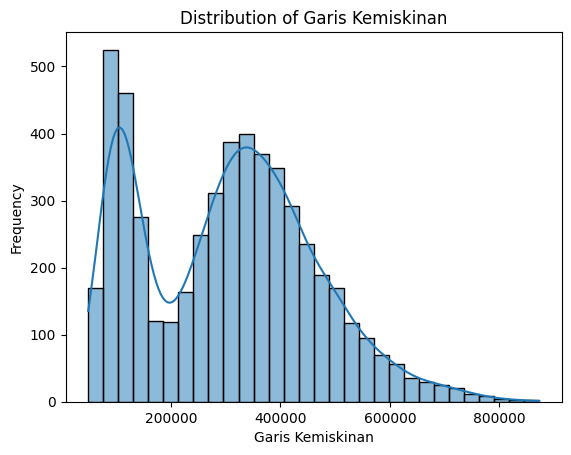

In [95]:
# Distribution plot for df_garis_kemiskinan
sns.histplot(df_garis_kemiskinan['gk'], bins=30, kde=True)
plt.title('Distribution of Garis Kemiskinan')
plt.xlabel('Garis Kemiskinan')
plt.ylabel('Frequency')
plt.show()

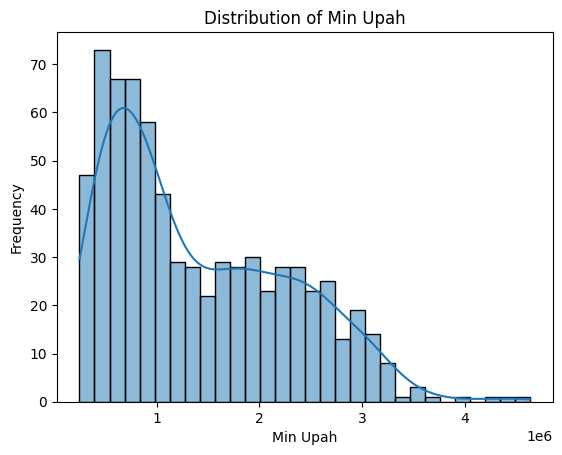

In [96]:
# Distribution plot for df_min_upah
sns.histplot(df_min_upah['ump'], bins=30, kde=True)
plt.title('Distribution of Min Upah')
plt.xlabel('Min Upah')
plt.ylabel('Frequency')
plt.show()

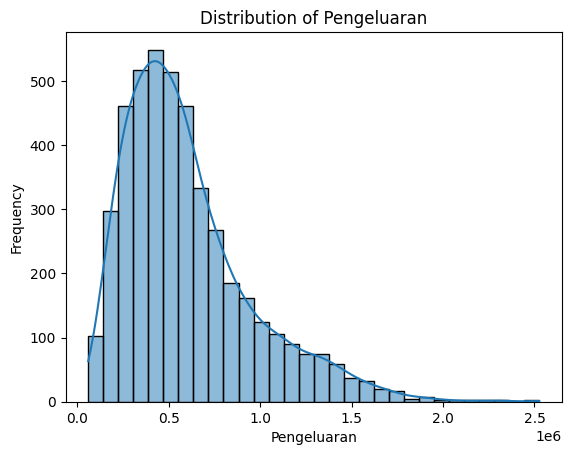

In [97]:
# Distribution plot for df_pengeluaran
sns.histplot(df_pengeluaran['peng'], bins=30, kde=True)
plt.title('Distribution of Pengeluaran')
plt.xlabel('Pengeluaran')
plt.ylabel('Frequency')
plt.show()

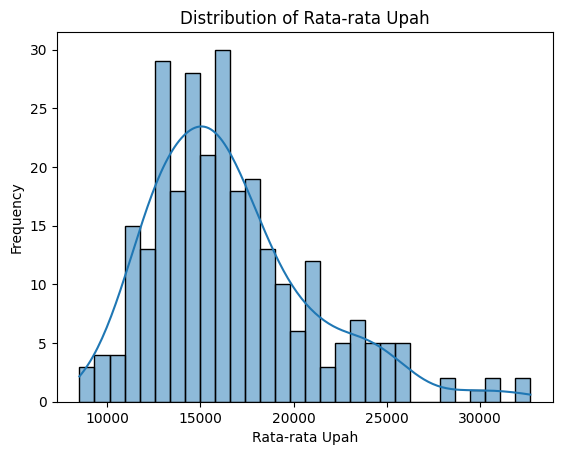

In [98]:
# Distribution plot for df_avg_upah
sns.histplot(df_avg_upah['upah'], bins=30, kde=True)
plt.title('Distribution of Rata-rata Upah')
plt.xlabel('Rata-rata Upah')
plt.ylabel('Frequency')
plt.show()

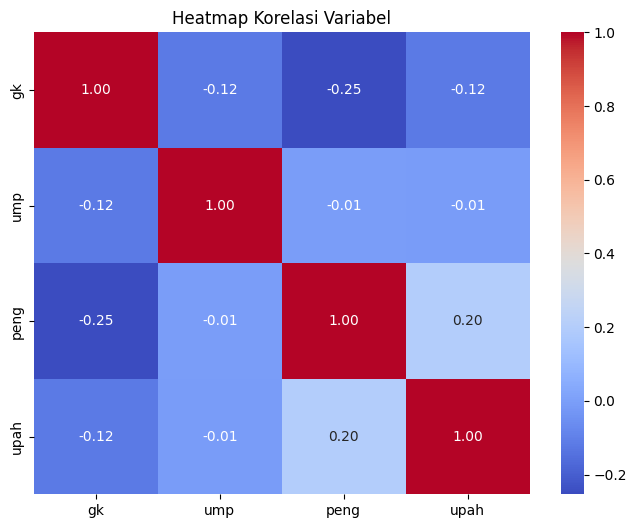

In [99]:
# Menggabungkan dataset numerik untuk korelasi
df_merged = df_garis_kemiskinan[['gk']].merge(df_min_upah[['ump']], left_index=True, right_index=True) \
                                       .merge(df_pengeluaran[['peng']], left_index=True, right_index=True) \
                                       .merge(df_avg_upah[['upah']], left_index=True, right_index=True)

# Membuat heatmap korelasi
plt.figure(figsize=(8,6))
sns.heatmap(df_merged.corr(), annot=True, cmap="coolwarm", fmt=".2f", linecolor="black")
plt.title("Heatmap Korelasi Variabel")
plt.show()

# **5. Data Preprocessing**

## Menghapus Kolom Data yang tidak diperlukan

In [100]:
df_garis_kemiskinan.drop(columns=['jenis', 'daerah'], inplace=True)
df_pengeluaran.drop(columns=['jenis', 'daerah'], inplace=True)

## Menangani data kosong

In [101]:
# Fill missing values in df_garis_kemiskinan with median
df_garis_kemiskinan['gk'].fillna(df_garis_kemiskinan['gk'].median(), inplace=True)

# Fill missing values in df_min_upah with median
df_min_upah['ump'].fillna(df_min_upah['ump'].median(), inplace=True)

# Fill missing values in df_pengeluaran with median
df_pengeluaran['peng'].fillna(df_pengeluaran['peng'].median(), inplace=True)

C:\Users\ACER\AppData\Local\Temp\ipykernel_22392\1516274357.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_garis_kemiskinan['gk'].fillna(df_garis_kemiskinan['gk'].median(), inplace=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_22392\1516274357.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

## Mendeteksi Outlier dan Menangani outlier tersebut

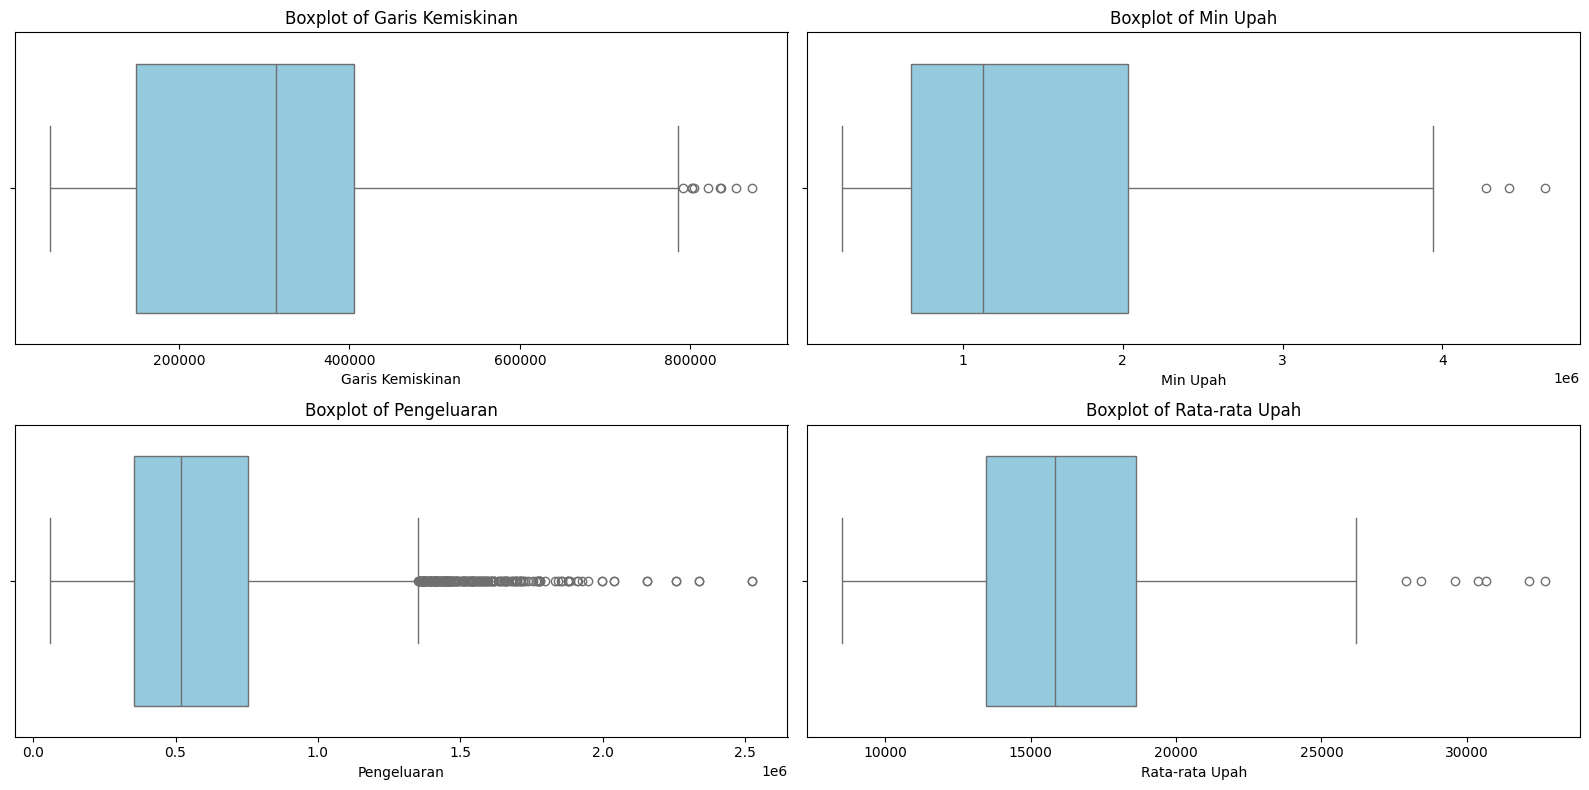

In [102]:

plt.figure(figsize=(16, 8))
for i, (df, column, title) in enumerate(zip(
        [df_garis_kemiskinan, df_min_upah, df_pengeluaran, df_avg_upah],
        ['gk', 'ump', 'peng', 'upah'],
        ['Garis Kemiskinan', 'Min Upah', 'Pengeluaran', 'Rata-rata Upah']), 1):

    plt.subplot(2, 2, i)
    sns.boxplot(x=df[column], color='skyblue')
    plt.title(f'Boxplot of {title}')
    plt.xlabel(title) 

plt.tight_layout()
plt.show()


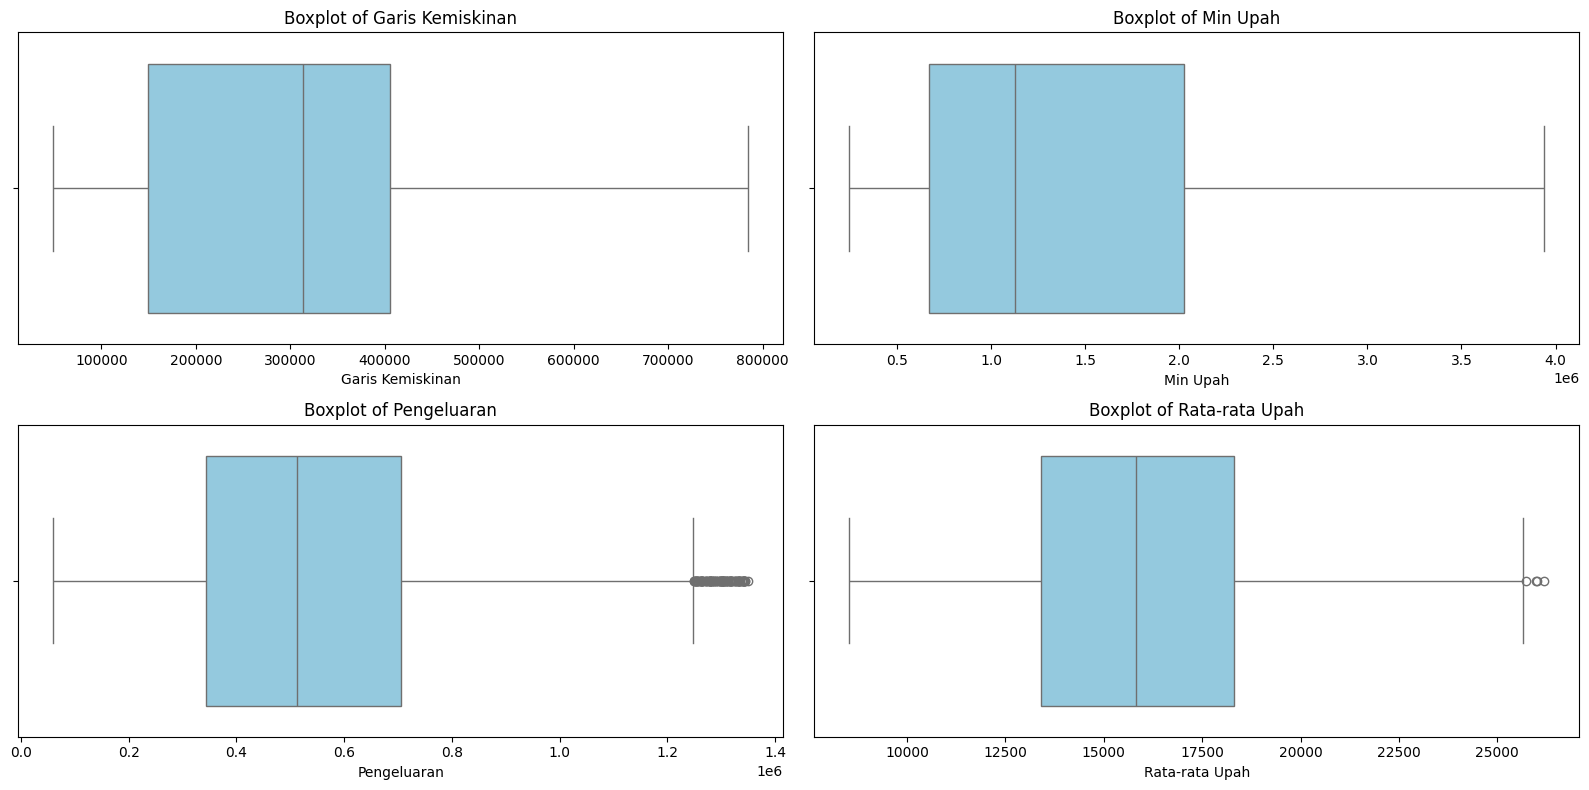

In [103]:
# Fungsi untuk menghapus outlier menggunakan IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Menghapus outlier
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df_cleaned

# Membersihkan outlier dari setiap dataset
df_garis_kemiskinan_clean = remove_outliers(df_garis_kemiskinan, 'gk')
df_min_upah_clean = remove_outliers(df_min_upah, 'ump')
df_pengeluaran_clean = remove_outliers(df_pengeluaran, 'peng')
df_avg_upah_clean = remove_outliers(df_avg_upah, 'upah')

plt.figure(figsize=(16, 8))
for i, (df, column, title) in enumerate(zip(
        [df_garis_kemiskinan_clean, df_min_upah_clean, df_pengeluaran_clean, df_avg_upah_clean],
        ['gk', 'ump', 'peng', 'upah'],
        ['Garis Kemiskinan', 'Min Upah', 'Pengeluaran', 'Rata-rata Upah']), 1):

    plt.subplot(2, 2, i)
    sns.boxplot(x=df[column], color='skyblue')
    plt.title(f'Boxplot of {title}')
    plt.xlabel(title) 

plt.tight_layout()
plt.show()

## Merge Data

In [104]:
merged_data = df_avg_upah_clean.merge(df_garis_kemiskinan_clean, on=['provinsi', 'tahun']) \
                       .merge(df_min_upah_clean, on=['provinsi', 'tahun']) \
                       .merge(df_pengeluaran_clean, on=['provinsi', 'tahun'])

merged_data.info()  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40733 entries, 0 to 40732
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  40733 non-null  object 
 1   tahun     40733 non-null  int64  
 2   upah      40733 non-null  int64  
 3   periode   40733 non-null  object 
 4   gk        40733 non-null  float64
 5   ump       40733 non-null  float64
 6   peng      40733 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 2.2+ MB


In [105]:
merged_data

,provinsi,tahun,upah,periode,gk,ump,peng
0,ACEH,2015,11226,MARET,293697.0,1900000.0,395136.0
1,ACEH,2015,11226,MARET,293697.0,1900000.0,260183.0
2,ACEH,2015,11226,MARET,293697.0,1900000.0,655319.0
3,ACEH,2015,11226,MARET,293697.0,1900000.0,466355.0
4,ACEH,2015,11226,MARET,293697.0,1900000.0,529945.0
...,...,...,...,...,...,...,...
40728,INDONESIA,2022,17542,SEPTEMBER,535547.0,2729463.0,721083.0
40729,INDONESIA,2022,17542,SEPTEMBER,535547.0,2729463.0,828158.0
40730,INDONESIA,2022,17542,SEPTEMBER,535547.0,2729463.0,665756.0
40731,INDONESIA,2022,17542,SEPTEMBER,535547.0,2729463.0,662025.0


## Normalisasi data atau standarisasi fitur

In [106]:
# Kolom yang akan di-scaling
num_cols = ['upah', 'gk', 'ump', 'peng']

selected_data = merged_data[num_cols]

In [107]:
scaler = RobustScaler()
scaled_data = scaler.fit_transform(selected_data)

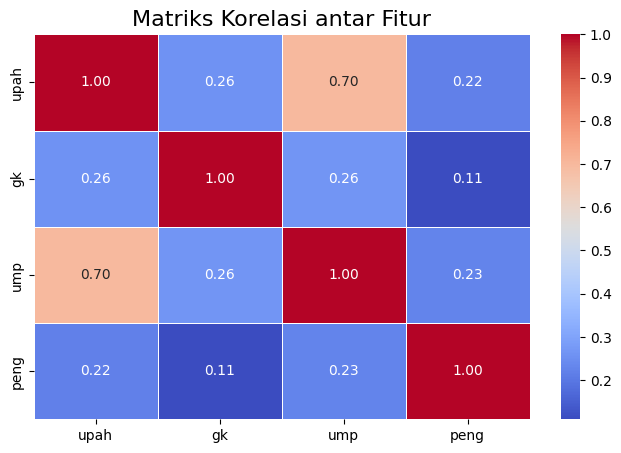

In [108]:
plt.figure(figsize=(8, 5))
sns.heatmap(selected_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi antar Fitur", fontsize=16)
plt.show()

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini saya menggunakan Algoritma DBSCAN karena terdapat banyak outlier pada dataset

In [110]:
# Misalkan data adalah DataFrame bernama `scaled_data` atau data asli kamu
# Ambil 25% data secara acak
sampled_data = scaled_data[np.random.choice(scaled_data.shape[0], size=int(0.25 * len(scaled_data)), replace=False)]


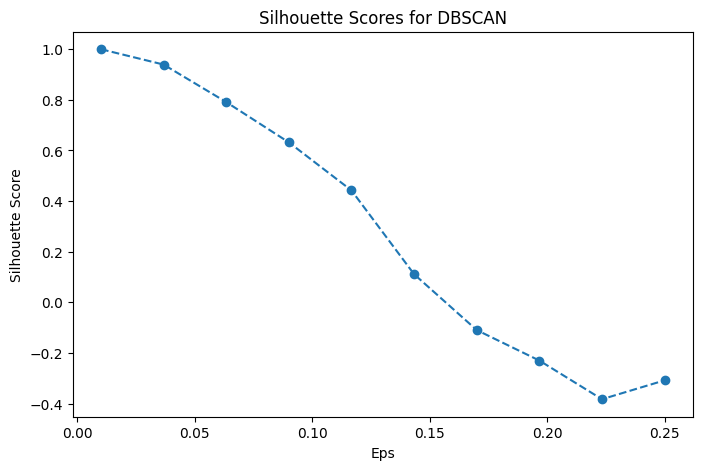

In [111]:
eps_values = np.linspace(0.01, 0.25, 10)
dbscan_scores = []
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(sampled_data)
    valid_labels = labels[labels != -1]
    if len(set(valid_labels)) > 1:
        score = silhouette_score(sampled_data[labels != -1], valid_labels)
        dbscan_scores.append(score)
    else:
        dbscan_scores.append(-1)

plt.figure(figsize=(8, 5))
plt.plot(eps_values, dbscan_scores, marker='o', linestyle='--')
plt.title("Silhouette Scores for DBSCAN")
plt.xlabel("Eps")
plt.ylabel("Silhouette Score")
plt.show()

- Silhoutte Score dibawah ini adalah jika saya melakukan deteksi eps hingga 1

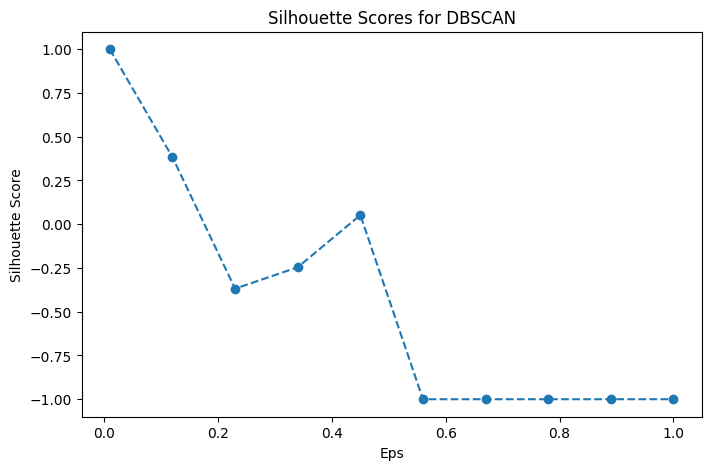


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [113]:
# Set nilai eps berdasarkan hasil k-distance plot (sekitar 0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
clusters = dbscan.fit_predict(scaled_data)  # Melakukan clustering pada seluruh data


# Menghitung Silhouette Score hanya untuk data yang bukan outliers (label -1)
valid_labels = clusters[clusters != -1]  # Mengambil label selain -1 (outliers)
valid_data = scaled_data[clusters != -1]  # Mengambil data yang bukan outliers

# Pastikan ada lebih dari satu cluster yang valid
if len(set(valid_labels)) > 1:
    score = silhouette_score(valid_data, valid_labels)
    print(f"Silhouette Score: {score}")     
else:
    print("Tidak cukup cluster yang valid untuk menghitung Silhouette Score.")


Silhouette Score: 0.7069716259118934


In [115]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

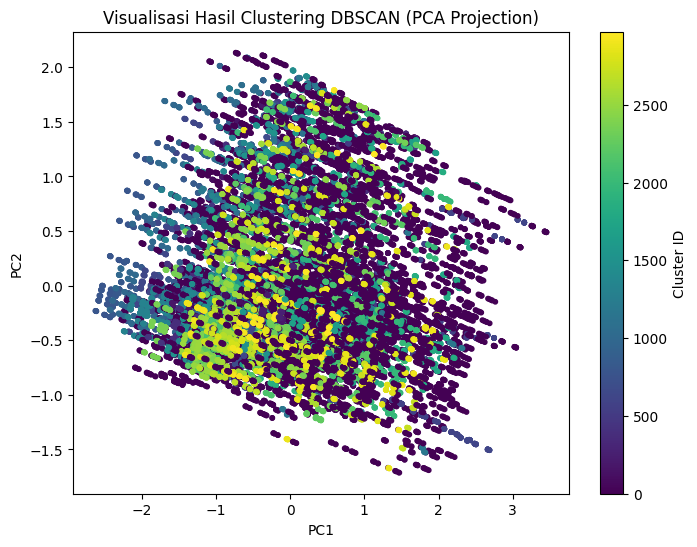

In [116]:
# Reduksi dimensi ke 2D menggunakan PCA
pca = PCA(n_components=4)
pca_result = pca.fit_transform(scaled_data)

# Visualisasi clustering hasil DBSCAN
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis', s=10)
plt.title('Visualisasi Hasil Clustering DBSCAN (PCA Projection)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(scatter, label='Cluster ID')  # Menampilkan colorbar untuk ID cluster
plt.show()

In [119]:
merged_data['avg_upah_per_bulan'] = merged_data['upah'] * 8 * 22
merged_data['cluster'] = clusters
valid_clusters_dbs = merged_data[merged_data['cluster'] != -1]

cluster_means_dbs = valid_clusters_dbs.groupby('cluster')[['ump', 'gk', 'avg_upah_per_bulan', 'peng']].mean()

def assign_category_based_on_cluster(cluster_mean):
    if (cluster_mean['ump'] < cluster_means_dbs['ump'].median() and
        cluster_mean['gk'] < cluster_means_dbs['gk'].median() and
        cluster_mean['avg_upah_per_bulan'] < cluster_means_dbs['avg_upah_per_bulan'].median() and
        cluster_mean['peng'] < cluster_means_dbs['peng'].median()):
        return 'Rendah'
    elif (cluster_mean['ump'] > cluster_means_dbs['ump'].median() and
          cluster_mean['gk'] > cluster_means_dbs['gk'].median() and
          cluster_mean['avg_upah_per_bulan'] > cluster_means_dbs['avg_upah_per_bulan'].median() and
          cluster_mean['peng'] > cluster_means_dbs['peng'].median()):
        return 'Tinggi'
    else:
        return 'Menengah'

merged_data['kategori_dbs'] = merged_data[merged_data['cluster'] != -1].apply(
    lambda row: assign_category_based_on_cluster(cluster_means_dbs.loc[row['cluster']]), axis=1
)

kategori_dbs_stats = merged_data.groupby('kategori_dbs')[['ump', 'gk', 'avg_upah_per_bulan', 'peng']].mean()

kategori_dbs_stats_formatted = kategori_dbs_stats.applymap(lambda x: f"{x:.2f}")
kategori_dbs_stats_formatted = kategori_dbs_stats_formatted.loc[['Rendah', 'Menengah', 'Tinggi']]
print(tabulate(kategori_dbs_stats_formatted, headers='keys', tablefmt='pretty'))



+--------------+------------+-----------+--------------------+-----------+
| kategori_dbs |    ump     |    gk     | avg_upah_per_bulan |   peng    |
+--------------+------------+-----------+--------------------+-----------+
|    Rendah    | 1605725.40 | 166208.46 |     2124945.19     | 426005.23 |
|   Menengah   | 2154319.49 | 260296.12 |     2702944.83     | 656653.10 |
|    Tinggi    | 2703605.79 | 411885.17 |     3321819.06     | 855198.39 |
+--------------+------------+-----------+--------------------+-----------+


C:\Users\ACER\AppData\Local\Temp\ipykernel_22392\2473625122.py:27: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  kategori_dbs_stats_formatted = kategori_dbs_stats.applymap(lambda x: f"{x:.2f}")


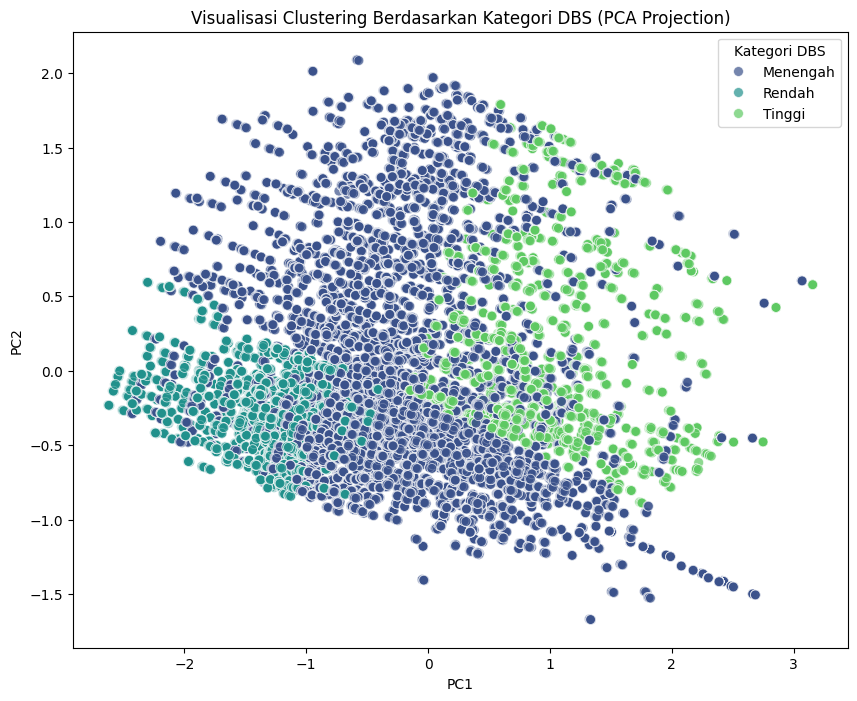

In [121]:
# Reduksi dimensi ke 2D menggunakan PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Menambahkan hasil PCA ke dalam dataframe
merged_data['PC1'] = pca_result[:, 0]
merged_data['PC2'] = pca_result[:, 1]

# Visualisasi clustering berdasarkan kategori_dbs
plt.figure(figsize=(10, 8))
sns.scatterplot(data=merged_data, x='PC1', y='PC2', hue='kategori_dbs', palette='viridis', s=50, alpha=0.7)
plt.title('Visualisasi Clustering Berdasarkan Kategori DBS (PCA Projection)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Kategori DBS')
plt.show()

In [135]:
merged_data['kategori_dbs'].value_counts()


kategori_dbs
Menengah    15024
Rendah       3207
Tinggi       2888
Name: count, dtype: int64

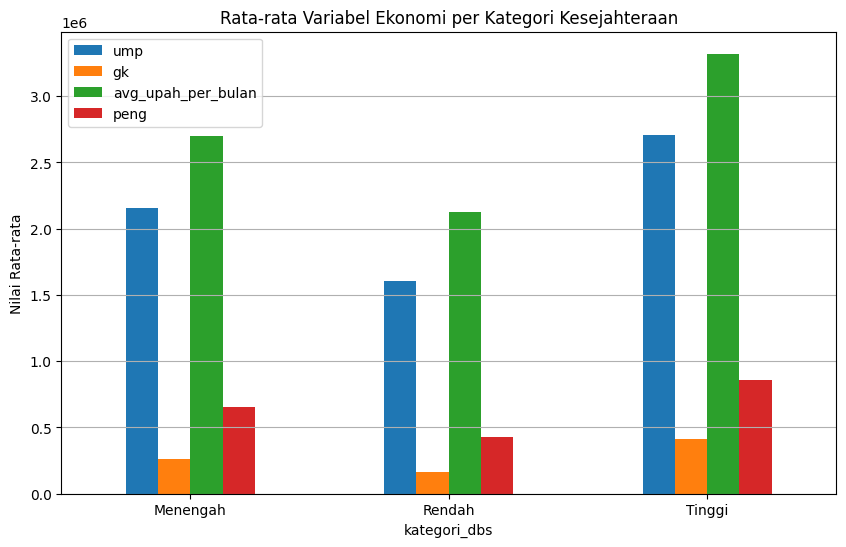

In [136]:
kategori_dbs_stats.plot(kind='bar', figsize=(10, 6))
plt.title("Rata-rata Variabel Ekonomi per Kategori Kesejahteraan")
plt.ylabel("Nilai Rata-rata")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


# Analisis Karakteristik Cluster dari Model DBSCAN

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1: Rendah
- **Rata-rata UMP:** Rp 1.652.725
- **Rata-rata Garis Kemiskinan (GK):** Rp 166.208
- **Rata-rata Upah per Bulan:** Rp 2.124.945
- **Rata-rata Pengeluaran:** Rp 426.085
- **Analisis:** Cluster ini merepresentasikan kelompok dengan tingkat kesejahteraan rendah. Nilai UMP, garis kemiskinan, dan upah bulanan tergolong rendah, mencerminkan keterbatasan daya beli. Mereka cenderung memiliki pengeluaran yang rendah, kemungkinan besar disebabkan oleh terbatasnya pendapatan.

## Cluster 2: Menengah
- **Rata-rata UMP:** Rp 2.154.319
- **Rata-rata GK:** Rp 262.996
- **Rata-rata Upah per** Bulan: Rp 2.702.944
- **Rata-rata Pengeluaran:** Rp 656.653
- **Analisis:** Cluster ini menunjukkan kelompok dengan kesejahteraan menengah. Nilai-nilai ekonomi berada di kisaran moderat, menunjukkan kestabilan dalam penghasilan dan kemampuan konsumsi. Mereka memiliki daya beli yang cukup dan berada di antara kelompok ekonomi bawah dan atas.

## Cluster 3: Tinggi
- **Rata-rata UMP:** Rp 2.708.606
- **Rata-rata GK:** Rp 411.885
- **Rata-rata Upah per** Bulan: Rp 3.321.819
- **Rata-rata Pengeluaran:** Rp 851.598
- **Analisis: Cluster ini** menggambarkan kelompok dengan kesejahteraan tinggi. Seluruh indikator berada jauh di atas median, mencerminkan pendapatan besar dan pengeluaran tinggi. Kelompok ini memiliki daya beli yang kuat dan kemungkinan memiliki akses lebih besar terhadap layanan pendidikan, kesehatan, dan gaya hidup yang lebih nyaman.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [145]:
# Hapus data yang belum memiliki label kategori
df_klasifikasi = merged_data.dropna(subset=['kategori_dbs'])

# Pilih hanya kolom yang kamu perlukan
kolom_penting = ['upah', 'gk', 'ump', 'peng', 'avg_upah_per_bulan', 'tahun', 'provinsi', 'kategori_dbs']
df_klasifikasi = df_klasifikasi[kolom_penting]

# Simpan ke CSV
df_klasifikasi.to_csv('data_klasifikasi_kesejahteraan.csv', index=False)
